In [32]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os

In [37]:
def read_log(fname):
    val = []
    exp_info = []
    in_start = False
    with open(fname, 'r') as fi:
        for ln in fi:
            p = ln.find('] ')
            items = ln[p + 2:].strip().split(', ')
            kvs = dict([ item.split('=') for item in items ])
            if 'val_epe' in kvs:
                val.append(kvs)
            elif 'start' in kvs:
                exp_info.append(kvs)
                in_start = True
            elif in_start:
                exp_info[-1].update(kvs)
                in_start = False
    return val, exp_info

def to_dataframe(kvs_list):
    keys = kvs_list[0].keys()
    df = { k : [] for k in keys }
    for kvs in kvs_list:
        for k, v in kvs.items():
            df[k].append(float(v))
    return df

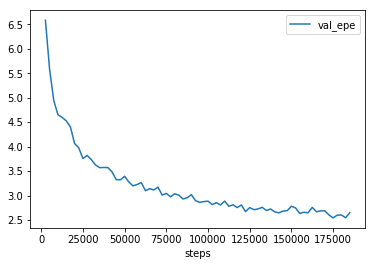

In [29]:
val_list = read_log('../logs/Mar16-2213.log')
val_df = pd.DataFrame(data=to_dataframe(val_list))
df.plot('steps', 'val_epe')

In [33]:
os.listdir('../logs')

['fuse_2.txt',
 'io_stderr.txt',
 'Mar03-2237',
 'Mar05-1012',
 'Mar11-2100.log',
 'Mar12-1323.log',
 'Mar12-1326.log',
 'Mar12-1411.log',
 'Mar12-1414.log',
 'Mar12-1423.log',
 'Mar12-1428.log',
 'Mar12-1439.log',
 'Mar13-1721.log',
 'Mar13-1724.log',
 'Mar13-1728.log',
 'Mar13-1816.log',
 'Mar15-1755.log',
 'Mar15-1826.log',
 'Mar15-1836.log',
 'Mar15-1836.log.bak',
 'Mar16-1119.log',
 'Mar16-1136.log',
 'Mar16-1136.log.bak',
 'Mar16-1136.val.log',
 'Mar16-2213.log',
 'Mar16-2213.log.bak',
 'Mar22-1921.log',
 'Mar22-1924.log',
 'Mar22-1924.log.bak',
 'Mar23-1239.log']

Mar22-1921
start=1, train=22232, val=640, steps=1, epe=22.345071580324362, loading_time=0.19, total_time=0.00
Mar22-1924
start=1, train=22232, val=640, steps=1, epe=12.567298769770819, loading_time=0.09, total_time=0.00
Mar23-1239
start=0, train=22232, val=640, batch=8, relative='', device='0', debug=False, fake_data=False, short_data=False, valid=False, checkpoint=None, tag=''


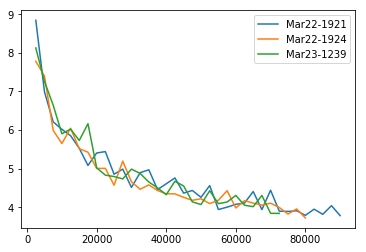

In [49]:
logs = ['Mar22-1921', 'Mar22-1924', 'Mar23-1239']
for log in logs:
    val_list, exp_info = read_log('../logs/{}.log'.format(log))
    val_df = pd.DataFrame(data=to_dataframe(val_list))
    plt.plot(val_df.steps, val_df.val_epe, label=log)
    plt.legend()
    print(log)
    print(', '.join(['{}={}'.format(k, v) for k, v in exp_info[0].items() ]))